Bimatrix games, different equilibria
    - Generate list of matrices (m1 = round 1)
    - Pure nash
    - Mixed nash
    - Prisoners' dilemma
    - RPS
    - Skip coarse-correlated equilibriums

FTL, OL, FTRL (regularized based on how recent the feedback was - *constant/i )
  A   B
X AX  BX
Y AY  BY
Online Learning
    - Given opponent took action X, we give alg AX, BX
MAB
    - Given opponent took action X and we took action A, we give MAB just AX

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys

import random
import nashpy as nash
import numpy as np

def rand_decimal():
    return random.randrange(0, 99)/100

def find_max_payoffs(payoff_matrix):
    max_row_payoff, max_col_payoff = 0, 0
    for row in payoff_matrix:
        for payoffs in row:
            row_payoff = payoffs[0]
            col_payoff = payoffs[1]
            if row_payoff > max_row_payoff: max_row_payoff = row_payoff
            if col_payoff > max_col_payoff: max_col_payoff = col_payoff 
    return max_row_payoff, max_col_payoff

def generate_dominant_strategy(num_actions=2, num_rounds=1):
    row_dominant, col_dominant = random.randrange(0, num_actions), random.randrange(0, num_actions)
    #print(row_dominant, col_dominant)
    #generate randomized payoff matrix
    payoff_matrix = [[[rand_decimal(), rand_decimal()] for i in range(num_actions)] for i in range(num_actions)]
    
    #overwrite payoffs of dominant row and col with 'dominant' payoffs (random values that are higher than the max payoff)
    max_row_payoff, max_col_payoff = find_max_payoffs(payoff_matrix)             
    for row in payoff_matrix:
        row[col_dominant][1] = random.randrange(int(max_col_payoff*100), 100)/100
    for payoff in payoff_matrix[row_dominant]:
        payoff[0] = random.randrange(int(max_row_payoff*100), 100)/100
        
    return payoff_matrix

def is_pure_nash(row, col, payoff_matrix, num_actions):
    row_player_val, col_player_val = payoff_matrix[row][col][0], payoff_matrix[row][col][1]
    for i in range(num_actions):
        if payoff_matrix[row][i][1] > col_player_val: return False
        if payoff_matrix[i][col][0] > row_player_val: return False
    return True

def add_pure_nash(payoff_matrix, num_actions):
    #print('pre-added')
    #print(payoff_matrix)
    pnash_row, pnash_col = random.randrange(0, num_actions), random.randrange(0, num_actions)
    old_row_val, old_col_val = payoff_matrix[pnash_row][pnash_col][0], payoff_matrix[pnash_row][pnash_col][1]
    row_max, col_max = 0, 0
    row_max_index, col_max_index = None, None
    for i in range(num_actions):
        if payoff_matrix[pnash_row][i][1] > col_max: 
            col_max = payoff_matrix[pnash_row][i][1]
            col_max_index = i
            
        if payoff_matrix[i][pnash_col][0] > row_max: 
            row_max = payoff_matrix[i][pnash_col][0]
            row_max_index = i
    
    col_max_loc = payoff_matrix[pnash_row][col_max_index]
    row_max_loc = payoff_matrix[row_max_index][pnash_col]
    col_max_loc[1], payoff_matrix[pnash_row][pnash_col][1] = old_col_val, col_max
    row_max_loc[0], payoff_matrix[pnash_row][pnash_col][0] = old_row_val, row_max
    #print('added')
    return [pnash_row, pnash_col]
    

def generate_pure_nash(num_actions=2, num_rounds=1):
    payoff_matrix = [[[rand_decimal(), rand_decimal()] for i in range(num_actions)] for i in range(num_actions)]
    pure_nash_list = []
    for row in range(num_actions):
        for col in range(num_actions):
            if is_pure_nash(row, col, payoff_matrix, num_actions): pure_nash_list.append([row, col])
    # if no pure nash randomly generated, recreate one
    if pure_nash_list == []:
        new_nash = add_pure_nash(payoff_matrix, num_actions)
        pure_nash_list.append(new_nash)
    
    #print(payoff_matrix)
    #print(pure_nash_list)
    return payoff_matrix

def generate_mixed_nash(num_actions=2, num_rounds=1):
    pure_nash_list = None
    while pure_nash_list != []:
        payoff_matrix = [[[rand_decimal(), rand_decimal()] for i in range(num_actions)] for i in range(num_actions)]
        pure_nash_list = []
        for row in range(num_actions):
            for col in range(num_actions):
                if is_pure_nash(row, col, payoff_matrix, num_actions): pure_nash_list.append([row, col])
    return payoff_matrix

def generate_any_nash(num_actions=2, num_rounds=1):
    #generate randomized payoff matrix, may have pure or mixed nash equilibrium(s)
    payoff_matrix = [[[rand_decimal(), rand_decimal()] for i in range(num_actions)] for i in range(num_actions)]
    return payoff_matrix

def generate_prisoners():
    row_cooperate_payoff, col_cooperate_payoff = random.randrange(3, 6), random.randrange(3, 6)
    row_betray_payoff, col_betray_payoff = random.randrange(10, 20), random.randrange(10, 20)
    row_double_betray_payoff, col_double_betray_payoff = random.randrange(0, 3), random.randrange(0, 3)
    payoff_matrix = [
        [[row_cooperate_payoff, col_cooperate_payoff], [0, col_betray_payoff]],
        [[row_betray_payoff, 0], [row_double_betray_payoff, col_double_betray_payoff]]
    ]
    return payoff_matrix

def generate_rps():
    rock_win_payoff = random.randrange(10, 20)
    paper_win_payoff = random.randrange(10, 20)
    scissors_win_payoff = random.randrange(10, 20)
    tie_payoff = random.randrange(0, 3)
    rock_loss_payoff = random.randrange(5, 10)
    paper_loss_payoff = random.randrange(5, 10)
    scissors_loss_payoff = random.randrange(5, 10)
    payoff_matrix = [
        [[tie_payoff, tie_payoff], [rock_loss_payoff, paper_win_payoff], [rock_win_payoff, scissors_loss_payoff]],
        [[paper_win_payoff, rock_loss_payoff], [tie_payoff, tie_payoff], [paper_loss_payoff, scissors_win_payoff]],
        [[scissors_loss_payoff, rock_win_payoff], [scissors_win_payoff, paper_loss_payoff], [tie_payoff, tie_payoff]]
    ]
    
    return payoff_matrix

generate_any_nash()
generate_prisoners()
generate_rps()

[[[2, 2], [6, 13], [19, 5]],
 [[13, 6], [2, 2], [9, 19]],
 [[5, 19], [19, 9], [2, 2]]]

## Multi-Armed Bandit Online Learning Algorithm

In [3]:
class MAB:
    
    def __init__(self, epsilon, num_actions=2):
        self.weights_vector = [[((1 / num_actions) * 100) for i in range(num_actions)]]
        self.totals_by_round = []
        self.partial_totals_by_round = []
        self.payoffs_by_round = []
        self.choices_by_round = []
        self.pi_tilda = []
        self.actions_list = [i for i in range(num_actions)]
        self.epsilon = epsilon
        self.num_actions = num_actions
        
    def reset_instance(self, epsilon=None, num_actions=2):
        self.weights_vector = [[((1 / num_actions) * 100) for i in range(num_actions)]]
        self.totals_by_round = []
        self.partial_totals_by_round = []
        self.payoffs_by_round = []
        self.choices_by_round = []
        self.pi_tilda = []
        self.actions_list = [i for i in range(num_actions)]
        self.num_actions = num_actions
        if epsilon == None:
            self.epsilon = self.epsilon
        else:
            epsilon = None
    
    def choose_action(self, max_payoff):
        # find weights
        current_weights = [None for i in range(self.num_actions)]
        for action in range(self.num_actions):
            if self.choices_by_round == []:
                #print(self.choices_by_round)
                current_weights = self.weights_vector[0] 
            else:
                #print(self.weights_vector)
                #print(self.choices_by_round)
                total_weights = sum(self.weights_vector[-1])
                V_last = self.partial_totals_by_round[-1][action]
                exp = V_last / max_payoff
                current_weights[action] = (pow(1 + self.epsilon, exp) / total_weights) * 100
        #convert probabiltiies to new MAB distribution
        mab_weights = []
        for i in range(len(current_weights)):
            mab_weights.append(((1 -  self.epsilon) * (current_weights[i] / 100) + (self.epsilon / self.num_actions)) * 100)
            
        # randomly select from actions using weights from MAB
        selected_action = random.choices(self.actions_list, weights=mab_weights, k=1)[0]
        self.pi_tilda.append(mab_weights[selected_action])
        self.weights_vector.append(current_weights)
        self.choices_by_round.append(selected_action)
        
        return selected_action
    
    def process_payoff(self, selected_payoff, payoff_list):
     # add new payoffs to totals, add payoff choice this round to payoffs matrix
        #self.payoffs_by_round.append(selected_payoff/self.pi_tilda[-1])
        self.payoffs_by_round.append(selected_payoff)

        if self.totals_by_round == []: 
            temp_totals = []
            for i in range(self.num_actions): 
                if i == self.choices_by_round[-1]: 
                    temp_totals.append(selected_payoff/self.pi_tilda[-1])
                else: 
                    temp_totals.append(0)
            self.partial_totals_by_round.append(temp_totals)
            self.totals_by_round.append([payoff_list[i] for i in range(self.num_actions)])
        else:
            last_round_totals = self.totals_by_round[-1]
            curr_payoffs = []
            for i in range(self.num_actions): 
                if i == self.choices_by_round[-1]: 
                    curr_payoffs.append(selected_payoff/self.pi_tilda[-1])
                else: 
                    curr_payoffs.append(0)
            self.partial_totals_by_round.append([(last_round_totals[i] + curr_payoffs[i]) for i in range(self.num_actions)])
            self.totals_by_round.append([last_round_totals[i] + payoff_list[i] for i in range(self.num_actions)])
                                        
        #print(self.totals_by_round)
        #print(self.payoffs_by_round)
        #NOTE: totals_by_round[-1] at the end of the simulation will help find 'OPT'

In [4]:
class FTLRegularization:
    
    def __init__(self, num_actions=2):
        self.weights_vector = [1 for i in range(num_actions)]
        self.totals_by_round = []
        self.payoffs_by_round = []
        self.choices_by_round = []
        self.all_payoffs_by_round = []
        self.actions_list = [i for i in range(num_actions)]
        self.epsilon = 1000
        self.num_actions = num_actions
        
    def reset_instance(self, epsilon=None, num_actions=2):
        self.weights_vector = [1 for i in range(num_actions)]
        self.totals_by_round = []
        self.payoffs_by_round = []
        self.choices_by_round = []
        self.all_payoffs_by_round = []
        self.actions_list = [i for i in range(num_actions)]
        self.num_actions = num_actions
        if epsilon == None:
            self.epsilon = self.epsilon
        else:
            epsilon = None
            
    def find_ftlr_vector(self):
        vector = [0 for i in range(self.num_actions)]
        for index in range(len(self.all_payoffs_by_round)):
            for action in range(self.num_actions):
                #print(action, index, self.all_payoffs_by_round)
                vector[action] += self.all_payoffs_by_round[index][action] * (index / len(self.all_payoffs_by_round))
        return vector
            
    
    def choose_action(self, max_payoff):
        # find weights
        current_weights = [None for i in range(self.num_actions)]
        ftlr_vector = self.find_ftlr_vector()
        for action in range(self.num_actions):
            if self.totals_by_round == []:
                V_last = 0
            else:
                V_last = ftlr_vector[action]
            exp = V_last / max_payoff
            current_weights[action] = pow(1 + self.epsilon, exp)
        # randomly select from actions using weights as probabilities
        selected_action = random.choices(self.actions_list, weights=current_weights, k=1)[0]
        self.choices_by_round.append(selected_action)
        self.weights_vector.append(current_weights)
        return selected_action
    
    def process_payoff(self, selected_payoff, payoff_list):
        # add new payoffs to totals, add payoff choice this round to payoffs matrix
        self.payoffs_by_round.append(selected_payoff)
        self.all_payoffs_by_round.append(payoff_list)
        if self.totals_by_round == []: 
            self.totals_by_round.append([payoff_list[i] for i in range(self.num_actions)])
        else:
            last_round_totals = self.totals_by_round[-1]
            self.totals_by_round.append([last_round_totals[i] + payoff_list[i] for i in range(self.num_actions)])                
            
    #NOTE: totals_by_round[-1] at the end of the simulation will help find 'OPT'

# Algorithm Classes

In [5]:
class ExponentialWeights:
    
    def __init__(self, epsilon, num_actions=2):
        self.weights_vector = [1 for i in range(num_actions)]
        self.totals_by_round = []
        self.payoffs_by_round = []
        self.choices_by_round = []
        self.actions_list = [i for i in range(num_actions)]
        self.epsilon = epsilon
        self.num_actions = num_actions
        
    def reset_instance(self, epsilon=None, num_actions=2):
        self.weights_vector = [1 for i in range(num_actions)]
        self.totals_by_round = []
        self.payoffs_by_round = []
        self.choices_by_round = []
        self.actions_list = [i for i in range(num_actions)]
        self.num_actions = num_actions
        if epsilon == None:
            self.epsilon = self.epsilon
        else:
            epsilon = None
    
    def choose_action(self, max_payoff):
        # find weights
        current_weights = [None for i in range(self.num_actions)]
        for action in range(self.num_actions):
            if self.totals_by_round == []:
                V_last = 0
            else:
                V_last = self.totals_by_round[-1][action]
            exp = V_last / max_payoff
            current_weights[action] = pow(1 + self.epsilon, exp)
        # randomly select from actions using weights as probabilities
        selected_action = random.choices(self.actions_list, weights=current_weights, k=1)[0]
        self.choices_by_round.append(selected_action)
        self.weights_vector.append(current_weights)
        return selected_action
    
    def process_payoff(self, selected_payoff, payoff_list):
        # add new payoffs to totals, add payoff choice this round to payoffs matrix
        self.payoffs_by_round.append(selected_payoff)
        if self.totals_by_round == []: 
            self.totals_by_round.append([payoff_list[i] for i in range(self.num_actions)])
        else:
            last_round_totals = self.totals_by_round[-1]
            self.totals_by_round.append([last_round_totals[i] + payoff_list[i] for i in range(self.num_actions)])
                
            
    #NOTE: totals_by_round[-1] at the end of the simulation will help find 'OPT'

In [6]:
class FTL:
    
    def __init__(self, num_actions=2):
        self.totals_by_round = []
        self.payoffs_by_round = []
        self.choices_by_round = []
        self.actions_list = [i for i in range(num_actions)]
        self.num_actions = num_actions
        
    def reset_instance(self, num_actions=2):
        self.totals_by_round = []
        self.payoffs_by_round = []
        self.choices_by_round = []
        self.actions_list = [i for i in range(num_actions)]
        self.num_actions = num_actions
    
    def choose_action(self, max_payoff):
        # randomly select from actions using highest total payoff so far
        if self.totals_by_round != []:
            selected_action = self.totals_by_round[-1].index(max(self.totals_by_round[-1]))
            self.choices_by_round.append(selected_action)
            return selected_action
        else:
            selected_action = random.randrange(0, self.num_actions)
            return selected_action
    
    def process_payoff(self, selected_payoff, payoff_list):
        # add new payoffs to totals, add payoff choice this round to payoffs matrix
        self.payoffs_by_round.append(selected_payoff)
        if self.totals_by_round == []: 
            self.totals_by_round.append([payoff_list[i] for i in range(self.num_actions)])
        else:
            last_round_totals = self.totals_by_round[-1]
            self.totals_by_round.append([last_round_totals[i] + payoff_list[i] for i in range(self.num_actions)])
                
            
    #NOTE: totals_by_round[-1] at the end of the simulation will help find 'OPT'

# Matchup Simulator

In [7]:
# helpers to find regret of an algorithm
def sum_to_round_i(alg_payoffs, current_round):
    total = 0
    for i in range(current_round):
        total += alg_payoffs[i]
    return total

def individual_regrets(alg_payoffs, round_totals):
    final_payoffs = round_totals[-1]
    opt_action = final_payoffs.index(max(final_payoffs))
    #print(opt_action)
    individual_regrets = [0 for i in range(len(alg_payoffs))]
    for round in range((len(alg_payoffs))):
        individual_regrets[round] = (round_totals[round][opt_action] - sum_to_round_i(alg_payoffs, round)) / (round + 1)
    return individual_regrets

#takes two instantiations of algorithm classes as inputs
def matchup_simulator(alg1, alg2, payoff_matrix, num_rounds, max_payoff):
    num_actions = len(payoff_matrix)
    for round in range(num_rounds):
        # determine which action each algorithm picks
        alg1_action = alg1.choose_action(max_payoff)
        alg2_action = alg2.choose_action(max_payoff)
        
        # determine the payoffs and payoff lists for the algorithm combination
        payoff_cell = payoff_matrix[alg1_action][alg2_action]
        alg1_payoff, alg2_payoff = payoff_cell[0], payoff_cell[1]        
        alg1_payoff_list, alg2_payoff_list = [], []
        for i in range(num_actions):
            alg1_payoff_list.append(payoff_matrix[i][alg2_action][0])
            alg2_payoff_list.append(payoff_matrix[alg1_action][i][1])
            
        # process the payoffs for the algorithm combination to prep alg1, alg2 for the next round    
        alg1.process_payoff(alg1_payoff, alg1_payoff_list)
        alg2.process_payoff(alg2_payoff, alg2_payoff_list)
    #print(alg1.choices_by_round)
    #print(alg2.choices_by_round)
    # find the regret at each round, return the regret list for each algorithm
    alg1_regrets = individual_regrets(alg1.payoffs_by_round, alg1.totals_by_round)
    alg2_regrets = individual_regrets(alg2.payoffs_by_round, alg2.totals_by_round)
    #print(alg2.payoffs_by_round)
    #print(alg2.totals_by_round)
    return alg1_regrets, alg2_regrets

payoff_matrix = generate_dominant_strategy()
alg1 = MAB(0.5)
alg2 = MAB(0.1)
#alg2 = FTLRegularization()
#print(alg2.weights_vector)
#print(alg2.choose_action(1))
#alg2.choose_action(1)
matchup_simulator(alg1, alg2, payoff_matrix, 100, 1)

([0.93,
  0.48000000000000004,
  0.5766666666666668,
  0.44000000000000006,
  0.504,
  0.5483333333333332,
  0.4742857142857142,
  0.5099999999999999,
  0.45333333333333337,
  0.40800000000000003,
  0.3709090909090909,
  0.4041666666666666,
  0.37307692307692303,
  0.3457142857142857,
  0.3233333333333333,
  0.3025,
  0.32999999999999996,
  0.31166666666666676,
  0.2952631578947369,
  0.28000000000000014,
  0.2671428571428573,
  0.2545454545454548,
  0.27652173913043504,
  0.2654166666666669,
  0.25440000000000024,
  0.24500000000000016,
  0.2355555555555558,
  0.22714285714285737,
  0.21965517241379326,
  0.21233333333333348,
  0.20677419354838722,
  0.20000000000000018,
  0.19424242424242436,
  0.188529411764706,
  0.18285714285714302,
  0.17805555555555566,
  0.17324324324324333,
  0.16868421052631588,
  0.16435897435897445,
  0.1602500000000001,
  0.15634146341463423,
  0.1523809523809525,
  0.14906976744186054,
  0.1454545454545456,
  0.14244444444444454,
  0.1393478260869566,
  0

# Visualization of Regrets

In [8]:
def visualize_regret(alg_results, rounds, lr_1, lr_2, plot_title, alg_1_name, alg_2_name, trial_type):
    
    file_name = trial_type + '_' + alg_1_name + alg_2_name + "_" + f'{lr_1}' + "_" + f'{lr_2}' + '.png'
    
    x = np.array(list(range(0, rounds)))
    y_1 = np.array(alg_results[0])
    y_2 = np.array(alg_results[1])
    plt.plot(x, y_1, label='{alg_1_name}, learning rate = {lr_1}'.format(alg_1_name=alg_1_name, lr_1 = lr_1), linewidth=1)
    plt.plot(x, y_2, label='{alg_2_name}, learning rate = {lr_2}'.format(alg_2_name=alg_2_name, lr_2 = lr_2), linewidth=1)
    plt.xlabel("Round")
    plt.ylabel("Average Regret Per Round")
    plt.title(plot_title)
    plt.legend(loc='best', prop={'size': 7})
    
    plt.savefig(file_name)

    plt.show()
    
    file1 = open("results.txt", "a")  # append mode
    file1.write(file_name + ", alg1" + ": " + f'{alg_results[2]}' + "\n")
    file1.write(file_name + ", alg2" + ": " f'{alg_results[3]}' + "\n")
    file1.close()

# Matchup Trials

In [9]:
# matchup trial helpers
def update_avg_regrets(alg1_avg_regret_per_round, alg2_avg_regret_per_round, n, new_alg1_regrets, new_alg2_regrets):
    if alg1_avg_regret_per_round == None:
        alg1_avg_regret_per_round = new_alg1_regrets
    else:
        for i in range(len(alg1_avg_regret_per_round)):
            alg1_avg_regret_per_round[i] = ((n * alg1_avg_regret_per_round[i]) + new_alg1_regrets[i]) / (n + 1) 
                
    if alg2_avg_regret_per_round == None:
        alg2_avg_regret_per_round = new_alg2_regrets
    else:
        for i in range(len(alg2_avg_regret_per_round)):
            alg2_avg_regret_per_round[i] = ((n * alg2_avg_regret_per_round[i]) + new_alg2_regrets[i]) / (n + 1)
            
def find_bimatrix_equilibria(payoff_matrix):
    row_player_payoffs = []
    col_player_payoffs = []
    for row in payoff_matrix:
        new_cplayer_row = []
        new_rplayer_row = []
        for payoff in row:
            new_cplayer_row.append(payoff[1])
            new_rplayer_row.append(payoff[0])
        row_player_payoffs.append(new_rplayer_row)
        col_player_payoffs.append(new_cplayer_row)
    
    A = np.array(row_player_payoffs)
    B = np.array(col_player_payoffs)
    game = nash.Game(A, B)
    equilibria = game.support_enumeration()
    return equilibria
            
# calculate what percent deviation alg1 and alg2 had from the closest nash equilibrium to their decisions
def dev_from_nash(alg1_last_choices, alg2_last_choices, payoff_matrix):
    num_actions = len(payoff_matrix)
    equilibria = find_bimatrix_equilibria(payoff_matrix)
    alg1_choice_averages = [0 for i in range(num_actions)]
    for action in range(num_actions):
        for choice in alg1_last_choices:
            if choice == action: alg1_choice_averages[action] += 1
    alg2_choice_averages = [0 for i in range(num_actions)]
    for action in range(num_actions):
        for choice in alg2_last_choices:
            if choice == action: alg2_choice_averages[action] += 1
                    
    for index in range(len(alg1_choice_averages)):
        alg1_choice_averages[index] = alg1_choice_averages[index] / len(alg1_last_choices)
    for index in range(len(alg2_choice_averages)):
        alg2_choice_averages[index] = alg2_choice_averages[index] / len(alg2_last_choices)
    
    
    alg1_min_diff = float('inf')
    alg2_min_diff = float('inf')
    for eq in equilibria:
        alg1_eq, alg2_eq = eq[0], eq[1]
        alg1_curr_diff = abs(alg1_eq[0] - alg1_choice_averages[0]) + abs(alg1_eq[1] - alg1_choice_averages[1])
        alg2_curr_diff = abs(alg2_eq[0] - alg2_choice_averages[0]) + abs(alg2_eq[1] - alg2_choice_averages[1])
        if alg1_curr_diff < alg1_min_diff: alg1_min_diff = alg1_curr_diff
        if alg2_curr_diff < alg2_min_diff: alg2_min_diff = alg2_curr_diff
            
    return alg1_min_diff, alg2_min_diff
    

def matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds):
    alg1_avg_regret_per_round, alg2_avg_regret_per_round = None, None
    alg1_dev_from_nash_list, alg2_dev_from_nash_list = [], []

    for payoff_matrix in payoff_matrix_list:
        # find which trial number we are on
        n = payoff_matrix_list.index(payoff_matrix)
        
        #find max payoff (h)
        max_payoff = 0
        for row in payoff_matrix:
            for payoff in row:
                if payoff[0] > max_payoff: max_payoff = payoff[0]
                if payoff[1] > max_payoff: max_payoff = payoff[1]
                    
        # run matchup and find regret lists
        new_alg1_regrets, new_alg2_regrets = matchup_simulator(alg1, alg2, payoff_matrix, num_rounds, max_payoff)
        
        # update average regret lists with new regret lists
        #update_avg_regrets(alg1_avg_regret_per_round, alg2_avg_regret_per_round, n, new_alg1_regrets, new_alg2_regrets)
        if alg1_avg_regret_per_round == None:
            alg1_avg_regret_per_round = new_alg1_regrets
        else:
            for i in range(len(alg1_avg_regret_per_round)):
                alg1_avg_regret_per_round[i] = ((n * alg1_avg_regret_per_round[i]) + new_alg1_regrets[i]) / (n + 1) 
                
        if alg2_avg_regret_per_round == None:
            alg2_avg_regret_per_round = new_alg2_regrets
        else:
            for i in range(len(alg2_avg_regret_per_round)):
                alg2_avg_regret_per_round[i] = ((n * alg2_avg_regret_per_round[i]) + new_alg2_regrets[i]) / (n + 1)
        #TODO: take final stored nash values, check if they are nash equilibrium, update average deviation from nash
        alg1_last_actions = alg1.choices_by_round[-(int(num_rounds/10)):]
        alg2_last_actions = alg2.choices_by_round[-(int(num_rounds/10)):]
        alg1dev, alg2dev = dev_from_nash(alg1_last_actions, alg2_last_actions, payoff_matrix)
        alg1_dev_from_nash_list.append(alg1dev)
        alg2_dev_from_nash_list.append(alg2dev)
        
        # reset alg1 and alg2 internally stored values
        alg1.reset_instance()
        alg2.reset_instance()
    
    # calculate average deviation from nash equilibria
    alg1_avg_nash_dev = sum(alg1_dev_from_nash_list) / len(alg1_dev_from_nash_list)
    alg2_avg_nash_dev = sum(alg2_dev_from_nash_list) / len(alg2_dev_from_nash_list)
    
    return [alg1_avg_regret_per_round, alg2_avg_regret_per_round, alg1_avg_nash_dev, alg2_avg_nash_dev]
        
        
payoff_matrix_list = []
for i in range(1000):
    payoff_matrix_list.append(generate_dominant_strategy())
alg1 = ExponentialWeights(0.5)
alg2 = ExponentialWeights(1.0)
num_rounds = 500
matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

#visualize_regret(alg1_regrets, alg2_regrets, num_rounds, 0.5, 1.0, 'Round vs. Average Regret for EW Algorithms', 'EW', 'EW')

C:\Users\bradl\AppData\Roaming\Python\Python37\site-packages\nashpy\algorithms\support_enumeration.py:196: RuntimeWarning: 
An even number of (2) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)


[[0.8886100000000045,
  0.5400050000000011,
  0.4173366666666661,
  0.3547125000000007,
  0.3128220000000001,
  0.2830866666666664,
  0.2580242857142856,
  0.23680249999999986,
  0.21914333333333308,
  0.20576400000000003,
  0.1911409090909092,
  0.1789516666666666,
  0.16862153846153835,
  0.15937714285714288,
  0.1504493333333336,
  0.14252437499999984,
  0.13582352941176476,
  0.12948166666666644,
  0.12376684210526313,
  0.11825600000000003,
  0.11335047619047622,
  0.10863409090909099,
  0.10446086956521741,
  0.10057333333333324,
  0.09694840000000006,
  0.09366730769230766,
  0.09050888888888875,
  0.08762928571428566,
  0.08483034482758628,
  0.08222133333333358,
  0.07979967741935476,
  0.07750968749999985,
  0.07532151515151528,
  0.07326235294117647,
  0.07135114285714295,
  0.06948194444444458,
  0.06772027027027042,
  0.0660381578947369,
  0.06444871794871794,
  0.06292499999999991,
  0.06143878048780492,
  0.060050000000000006,
  0.05871279069767434,
  0.05743795454545457

# Run Trials on Payoff Matrix Types

In [10]:
# Constants
NUM_TRIALS = 1000
NUM_ROUNDS = 500

#
# Trials for payoff matrices with RPS
#
payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_rps())
alg1 = ExponentialWeights(1.0)
alg2 = ExponentialWeights(1.0)
num_rounds = NUM_ROUNDS
rps_result_array = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

#visualize_regret(rps_result_array[0], rps_result_array[1], num_rounds, 1.0, 1.0, 'Round vs. Average Regret for EW Algorithms', 'EW', 'EW')

print(rps_result_array[0])
print(rps_result_array[1])

[9.05, 4.75, 3.8666666666666663, 2.8875, 2.29, 2.041666666666667, 1.9142857142857141, 1.6625, 2.061111111111111, 1.9800000000000004]
[8.55, 4.85, 3.400000000000001, 2.8875, 2.5999999999999996, 2.6666666666666665, 2.307142857142857, 2.2875, 2.627777777777778, 2.22]


### Dominant Strategy EW Trials

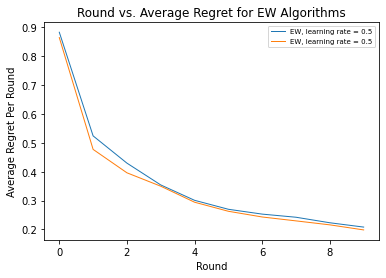

C:\Users\bradl\AppData\Roaming\Python\Python37\site-packages\nashpy\algorithms\support_enumeration.py:196: RuntimeWarning: 
An even number of (2) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)


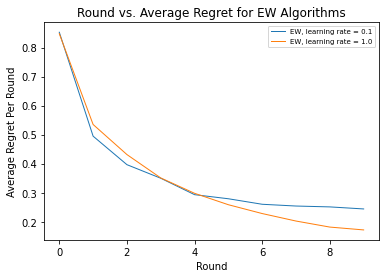

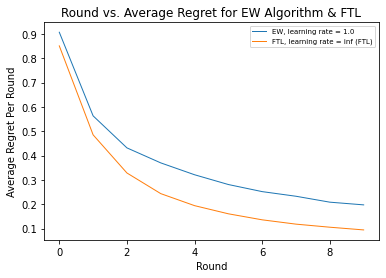

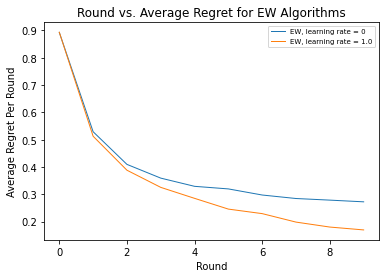

In [11]:
#
# Trials for payoff matrices with dominant equilibria
#

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_dominant_strategy())
alg1 = ExponentialWeights(0.5)
alg2 = ExponentialWeights(0.5)
num_rounds = NUM_ROUNDS
ew_dominant_result_array1 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(ew_dominant_result_array1, num_rounds, 0.5, 0.5, 'Round vs. Average Regret for EW Algorithms', 'EW', 'EW', 'DomStr')

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_dominant_strategy())
alg1 = ExponentialWeights(0.1)
alg2 = ExponentialWeights(1.0)
num_rounds = NUM_ROUNDS
ew_dominant_result_array2 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(ew_dominant_result_array2, num_rounds, 0.1, 1.0, 'Round vs. Average Regret for EW Algorithms', 'EW', 'EW', 'DomStr')

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_dominant_strategy())
alg1 = ExponentialWeights(1.0)
alg2 = FTL()
num_rounds = NUM_ROUNDS
ew_dominant_result_array3 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(ew_dominant_result_array3, num_rounds, 1.0, 'inf (FTL)', 'Round vs. Average Regret for EW Algorithm & FTL', 'EW', 'FTL', 'DomStr')

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_dominant_strategy())
alg1 = ExponentialWeights(0)
alg2 = ExponentialWeights(1.0)
num_rounds = NUM_ROUNDS
ew_dominant_result_array4 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(ew_dominant_result_array4, num_rounds, 0, 1.0, 'Round vs. Average Regret for EW Algorithms', 'EW', 'EW', 'DomStr')

#print(ew_dominant_result_array4[2])

#print(ew_dominant_result_array4[3])

#print(ew_dominant_result_array4[0])

#print(ew_dominant_result_array4[1])

#print(num_rounds)

### Pure Nash EW Trials

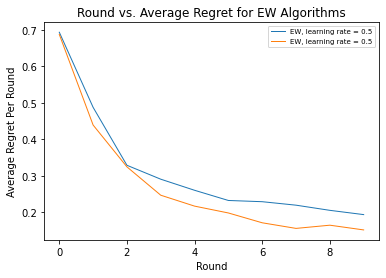

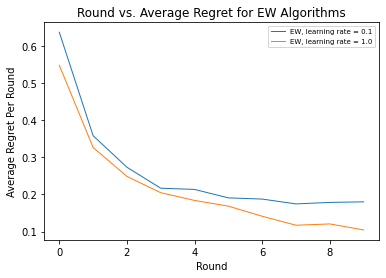

C:\Users\bradl\AppData\Roaming\Python\Python37\site-packages\nashpy\algorithms\support_enumeration.py:196: RuntimeWarning: 
An even number of (2) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)


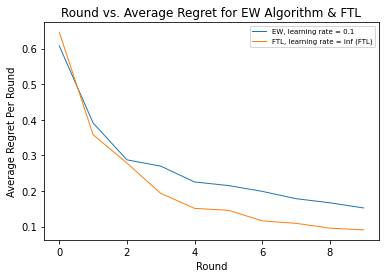

C:\Users\bradl\AppData\Roaming\Python\Python37\site-packages\nashpy\algorithms\support_enumeration.py:196: RuntimeWarning: 
An even number of (2) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)


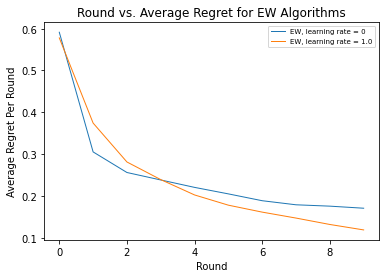

In [12]:
#
# Trials for payoff matrices with Pure Nash equilibria
#

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_pure_nash())
alg1 = ExponentialWeights(0.5)
alg2 = ExponentialWeights(0.5)
num_rounds = NUM_ROUNDS
ew_pure_result_array1 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(ew_pure_result_array1, num_rounds, 0.5, 0.5, 'Round vs. Average Regret for EW Algorithms', 'EW', 'EW', 'Pure Nash')

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_pure_nash())
alg1 = ExponentialWeights(0.1)
alg2 = ExponentialWeights(1.0)
num_rounds = NUM_ROUNDS
ew_pure_result_array2 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(ew_pure_result_array2, num_rounds, 0.1, 1.0, 'Round vs. Average Regret for EW Algorithms', 'EW', 'EW', 'Pure Nash')

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_pure_nash())
alg1 = ExponentialWeights(1.0)
alg2 = FTL()
num_rounds = NUM_ROUNDS
ew_pure_result_array3 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(ew_pure_result_array3, num_rounds, 0.1, 'inf (FTL)', 'Round vs. Average Regret for EW Algorithm & FTL', 'EW', 'FTL', 'Pure Nash')

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_pure_nash())
alg1 = ExponentialWeights(0)
alg2 = ExponentialWeights(1.0)
num_rounds = NUM_ROUNDS
ew_pure_result_array4 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(ew_pure_result_array4, num_rounds, 0, 1.0, 'Round vs. Average Regret for EW Algorithms', 'EW', 'EW', 'Pure Nash')

### Mixed Nash EW Trials

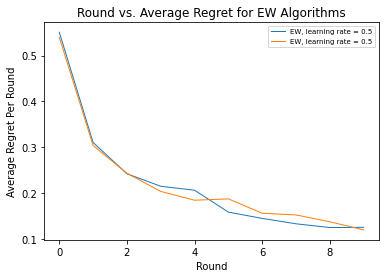

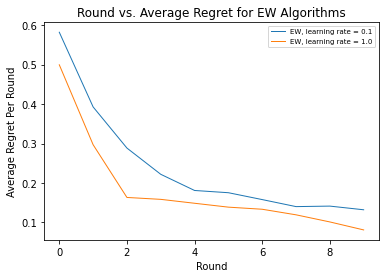

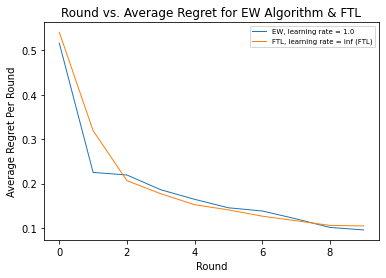

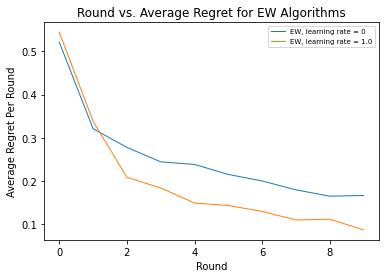

In [13]:
#
# Trials for payoff matrices with Mixed Nash equilibria
#

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_mixed_nash())
alg1 = ExponentialWeights(0.5)
alg2 = ExponentialWeights(0.5)
num_rounds = NUM_ROUNDS
mn_result_array1 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mn_result_array1, num_rounds, 0.5, 0.5, 'Round vs. Average Regret for EW Algorithms', 'EW', 'EW', 'Mix Nash')

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_mixed_nash())
alg1 = ExponentialWeights(0.1)
alg2 = ExponentialWeights(1.0)
num_rounds = NUM_ROUNDS
mn_result_array2 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mn_result_array2, num_rounds, 0.1, 1.0, 'Round vs. Average Regret for EW Algorithms', 'EW', 'EW', 'Mix Nash')

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_mixed_nash())
alg1 = ExponentialWeights(1.0)
alg2 = FTL()
num_rounds = NUM_ROUNDS
mn_result_array3 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mn_result_array3, num_rounds, 1.0, 'inf (FTL)', 'Round vs. Average Regret for EW Algorithm & FTL', 'EW', 'FTL', 'Mix Nash')


payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_mixed_nash())
alg1 = ExponentialWeights(0)
alg2 = ExponentialWeights(1.0)
num_rounds = NUM_ROUNDS
mn_result_array4 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mn_result_array4, num_rounds, 0, 1.0, 'Round vs. Average Regret for EW Algorithms', 'EW', 'EW', 'Mix Nash')


### Any Nash EW Trials

C:\Users\bradl\AppData\Roaming\Python\Python37\site-packages\nashpy\algorithms\support_enumeration.py:196: RuntimeWarning: 
An even number of (2) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)


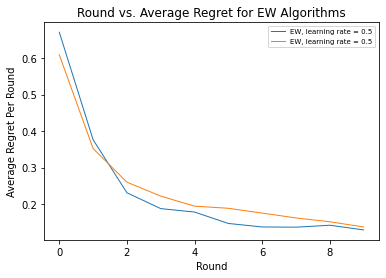

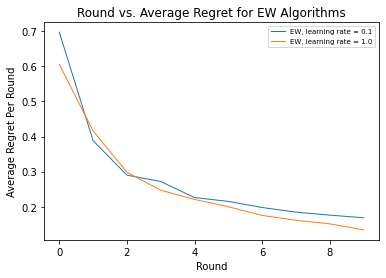

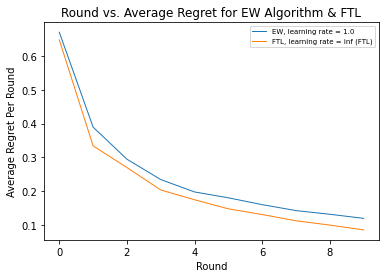

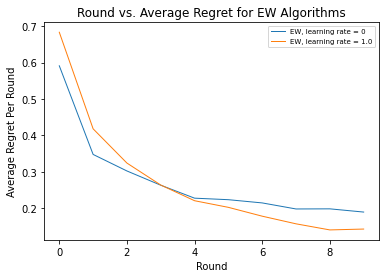

In [14]:
#
# Trials for payoff matrices with Any Nash Equilibria
#

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_any_nash())
alg1 = ExponentialWeights(0.5)
alg2 = ExponentialWeights(0.5)
num_rounds = NUM_ROUNDS
an_result_array1 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(an_result_array1, num_rounds, 0.5, 0.5, 'Round vs. Average Regret for EW Algorithms', 'EW', 'EW', 'Any Nash')

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_any_nash())
alg1 = ExponentialWeights(0.1)
alg2 = ExponentialWeights(1.0)
num_rounds = NUM_ROUNDS
an_result_array2 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(an_result_array2, num_rounds, 0.1, 1.0, 'Round vs. Average Regret for EW Algorithms', 'EW', 'EW', 'Any Nash')


payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_any_nash())
alg1 = ExponentialWeights(1.0)
alg2 = FTL()
num_rounds = NUM_ROUNDS
an_result_array3 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(an_result_array3, num_rounds, 1.0, 'inf (FTL)', 'Round vs. Average Regret for EW Algorithm & FTL', 'EW', 'FTL', 'Any Nash')

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_any_nash())
alg1 = ExponentialWeights(0)
alg2 = ExponentialWeights(1.0)
num_rounds = NUM_ROUNDS
an_result_array4 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(an_result_array4, num_rounds, 0, 1.0, 'Round vs. Average Regret for EW Algorithms', 'EW', 'EW', 'Any Nash')


### Prisoners' Dilemma EW Trials

C:\Users\bradl\AppData\Roaming\Python\Python37\site-packages\nashpy\algorithms\support_enumeration.py:196: RuntimeWarning: 
An even number of (2) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)


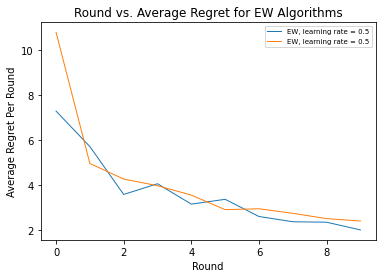

C:\Users\bradl\AppData\Roaming\Python\Python37\site-packages\nashpy\algorithms\support_enumeration.py:196: RuntimeWarning: 
An even number of (2) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)


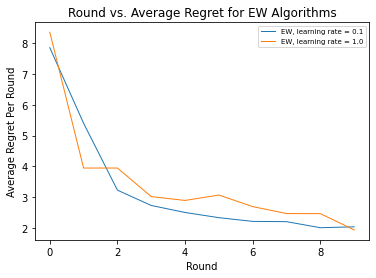

C:\Users\bradl\AppData\Roaming\Python\Python37\site-packages\nashpy\algorithms\support_enumeration.py:196: RuntimeWarning: 
An even number of (2) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)


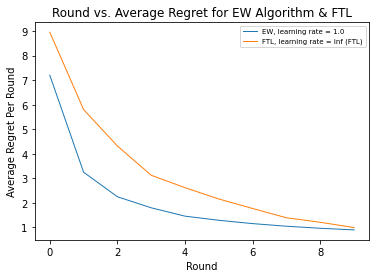

C:\Users\bradl\AppData\Roaming\Python\Python37\site-packages\nashpy\algorithms\support_enumeration.py:196: RuntimeWarning: 
An even number of (2) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)


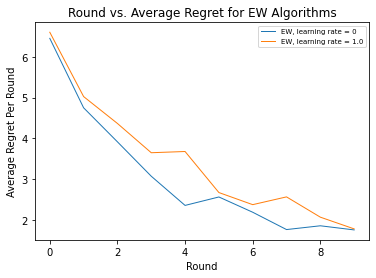

In [15]:
#
# Trials for payoff matrices with Prisoners' Dilemma
#

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_prisoners())
alg1 = ExponentialWeights(0.5)
alg2 = ExponentialWeights(0.5)
num_rounds = NUM_ROUNDS
p_result_array1 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(p_result_array1, num_rounds, 0.5, 0.5, 'Round vs. Average Regret for EW Algorithms', 'EW', 'EW', 'Pr Dil')


payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_prisoners())
alg1 = ExponentialWeights(0.1)
alg2 = ExponentialWeights(1.0)
num_rounds = NUM_ROUNDS
p_result_array2 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(p_result_array2, num_rounds, 0.1, 1.0, 'Round vs. Average Regret for EW Algorithms', 'EW', 'EW', 'Pr Dil')

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_prisoners())
alg1 = ExponentialWeights(1.0)
alg2 = FTL()
num_rounds = NUM_ROUNDS
p_result_array3 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(p_result_array3, num_rounds, 1.0, 'inf (FTL)', 'Round vs. Average Regret for EW Algorithm & FTL', 'EW', 'FTL', 'Pr Dil')
payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_prisoners())
alg1 = ExponentialWeights(0)
alg2 = ExponentialWeights(1.0)
num_rounds = NUM_ROUNDS
p_result_array4 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(p_result_array4, num_rounds, 0, 1.0, 'Round vs. Average Regret for EW Algorithms', 'EW', 'EW', 'Pr Dil')

### Dominant Strategy MAB Trials

C:\Users\bradl\AppData\Roaming\Python\Python37\site-packages\nashpy\algorithms\support_enumeration.py:196: RuntimeWarning: 
An even number of (2) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)


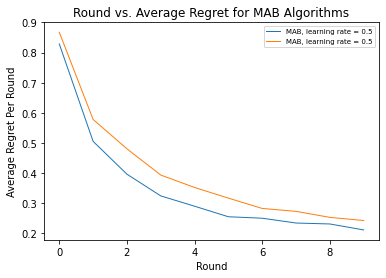

C:\Users\bradl\AppData\Roaming\Python\Python37\site-packages\nashpy\algorithms\support_enumeration.py:196: RuntimeWarning: 
An even number of (2) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)


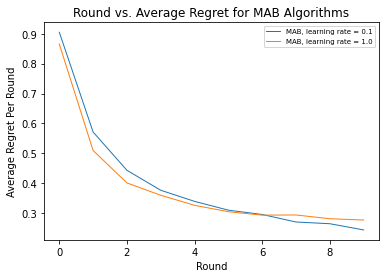

C:\Users\bradl\AppData\Roaming\Python\Python37\site-packages\nashpy\algorithms\support_enumeration.py:196: RuntimeWarning: 
An even number of (2) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)


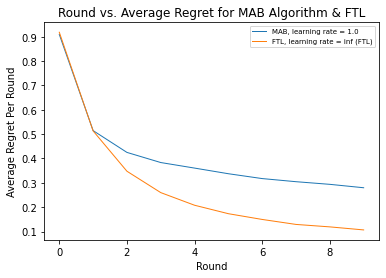

C:\Users\bradl\AppData\Roaming\Python\Python37\site-packages\nashpy\algorithms\support_enumeration.py:196: RuntimeWarning: 
An even number of (2) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)


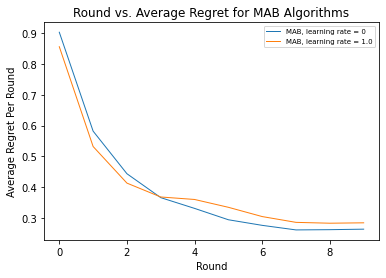

In [16]:
#
# Trials for payoff matrices with dominant equilibria
#

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_dominant_strategy())
alg1 = MAB(0.5)
alg2 = MAB(0.5)
num_rounds = NUM_ROUNDS
mab_dominant_result_array1 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mab_dominant_result_array1, num_rounds, 0.5, 0.5, 'Round vs. Average Regret for MAB Algorithms', 'MAB', 'MAB', 'Dom Str')

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_dominant_strategy())
alg1 = MAB(0.1)
alg2 = MAB(1.0)
num_rounds = NUM_ROUNDS
mab_dominant_result_array2 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mab_dominant_result_array2, num_rounds, 0.1, 1.0, 'Round vs. Average Regret for MAB Algorithms', 'MAB', 'MAB', 'Dom Str')

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_dominant_strategy())
alg1 = MAB(1.0)
alg2 = FTL()
num_rounds = NUM_ROUNDS
mab_dominant_result_array3 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mab_dominant_result_array3, num_rounds, 1.0, 'inf (FTL)', 'Round vs. Average Regret for MAB Algorithm & FTL', 'MAB', 'FTL', 'Dom Str')

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_dominant_strategy())
alg1 = MAB(0)
alg2 = MAB(1.0)
num_rounds = NUM_ROUNDS
mab_dominant_result_array4 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mab_dominant_result_array4, num_rounds, 0, 1.0, 'Round vs. Average Regret for MAB Algorithms', 'MAB', 'MAB', 'Dom Str')

### Pure Nash MAB Trials

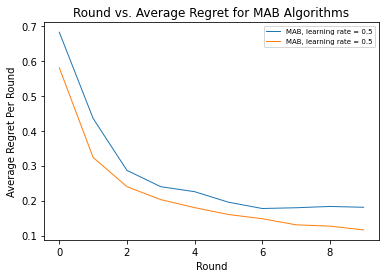

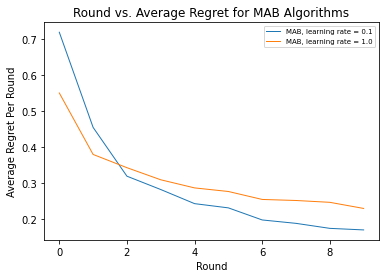

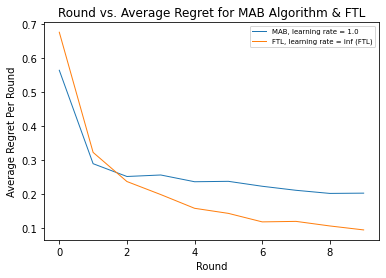

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [17]:
#
# Trials for payoff matrices with pure nash equilibria
#

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_pure_nash())
alg1 = MAB(0.5)
alg2 = MAB(0.5)
num_rounds = NUM_ROUNDS
mab_pn_result_array1 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mab_pn_result_array1, num_rounds, 0.5, 0.5, 'Round vs. Average Regret for MAB Algorithms', 'MAB', 'MAB', 'Pure Nash')

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_pure_nash())
alg1 = MAB(0.1)
alg2 = MAB(1.0)
num_rounds = NUM_ROUNDS
mab_pn_result_array2 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mab_pn_result_array2, num_rounds, 0.1, 1.0, 'Round vs. Average Regret for MAB Algorithms', 'MAB', 'MAB', 'Pure Nash')

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_pure_nash())
alg1 = MAB(1.0)
alg2 = FTL()
num_rounds = NUM_ROUNDS
mab_pn_result_array3 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mab_pn_result_array3, num_rounds, 1.0, 'inf (FTL)', 'Round vs. Average Regret for MAB Algorithm & FTL', 'MAB', 'FTL', 'Pure Nash')


payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_pure_nash())
alg1 = MAB(0)
alg2 = MAB(1.0)
num_rounds = NUM_ROUNDS
mab_pn_result_array4 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mab_pn_result_array4, num_rounds, 0, 1.0, 'Round vs. Average Regret for MAB Algorithms', 'MAB', 'MAB', 'Pure Nash')


### Any Nash MAB Trials

In [ ]:
#
# Trials for payoff matrices with pure nash equilibria
#

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_any_nash())
alg1 = MAB(0.5)
alg2 = MAB(0.5)
num_rounds = NUM_ROUNDS
mab_an_result_array1 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mab_an_result_array1, num_rounds, 0.5, 0.5, 'Round vs. Average Regret for MAB Algorithms', 'MAB', 'MAB', 'Any Nash')

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_any_nash())
alg1 = MAB(0.1)
alg2 = MAB(1.0)
num_rounds = NUM_ROUNDS
mab_an_result_array2 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mab_an_result_array2, num_rounds, 0.1, 1.0, 'Round vs. Average Regret for MAB Algorithms', 'MAB', 'MAB', 'Any Nash')


payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_any_nash())
alg1 = MAB(1.0)
alg2 = FTL()
num_rounds = NUM_ROUNDS
mab_an_result_array3 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mab_an_result_array3, num_rounds, 1.0, 'inf (FTL)', 'Round vs. Average Regret for MAB Algorithm & FTL', 'MAB', 'FTL', 'Any Nash')


payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_any_nash())
alg1 = MAB(0)
alg2 = MAB(1.0)
num_rounds = NUM_ROUNDS
mab_an_result_array4 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mab_an_result_array4, num_rounds, 0, 1.0, 'Round vs. Average Regret for MAB Algorithms', 'MAB', 'MAB', 'Any Nash')


### Prisoners' Dilemma Trials

In [ ]:
#
# Trials for payoff matrices with pure nash equilibria
#

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_prisoners())
alg1 = MAB(0.5)
alg2 = MAB(0.5)
num_rounds = NUM_ROUNDS
mab_p_result_array1 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mab_p_result_array1, num_rounds, 0.5, 0.5, 'Round vs. Average Regret for MAB Algorithms', 'MAB', 'MAB', 'Pris Dil')


payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_prisoners())
alg1 = MAB(0.1)
alg2 = MAB(1.0)
num_rounds = NUM_ROUNDS
mab_p_result_array2 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mab_p_result_array2, num_rounds, 0.1, 1.0, 'Round vs. Average Regret for MAB Algorithms', 'MAB', 'MAB', 'Pris Dil')


payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_prisoners())
alg1 = MAB(1.0)
alg2 = FTL()
num_rounds = NUM_ROUNDS
mab_p_result_array3 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mab_p_result_array3, num_rounds, 1.0, 'inf (FTL)', 'Round vs. Average Regret for MAB Algorithm & FTL', 'MAB', 'FTL', 'Pris Dil')

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_prisoners())
alg1 = MAB(0)
alg2 = MAB(1.0)
num_rounds = NUM_ROUNDS
mab_p_result_array4 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mab_p_result_array4, num_rounds, 0, 1.0, 'Round vs. Average Regret for MAB Algorithms', 'MAB', 'MAB', 'Pris Dil')


# EW vs. MAB Trials

In [ ]:
#
# Trials for payoff matrices with pure nash equilibria
#

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_any_nash())
alg1 = ExponentialWeights(0.5)
alg2 = MAB(0.5)
num_rounds = NUM_ROUNDS
ew_mab_result_array1 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mab_p_result_array1, num_rounds, 0.5, 0.5, 'Round vs. Average Regret for EW & MAB Algorithms', 'EW', 'MAB', '')

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_any_nash())
alg1 = ExponentialWeights(0.1)
alg2 = MAB(1.0)
num_rounds = NUM_ROUNDS
ew_mab_result_array2 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mab_p_result_array2, num_rounds, 0.1, 1.0, 'Round vs. Average Regret for EW & MAB Algorithms', 'EW', 'MAB', '')


payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_any_nash())
alg1 = ExponentialWeights(1.0)
alg2 = MAB(0.1)
num_rounds = NUM_ROUNDS
ew_mab_result_array3 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mab_p_result_array3, num_rounds, 1.0, 0.1, 'Round vs. Average Regret for EW & MAB Algorithms', 'EW', 'MAB', '')


# Part 2


In [ ]:
def generate_asymmetric_prisoners():
    row_cooperate_payoff, col_cooperate_payoff = random.randrange(3, 6), random.randrange(3, 6)
    row_betray_payoff, col_betray_payoff = random.randrange(10, 20), random.randrange(10, 20)
    row_double_betray_payoff, col_double_betray_payoff = random.randrange(0, 3), random.randrange(0, 3)
    payoff_matrix = [
        [[row_cooperate_payoff, 10*col_cooperate_payoff], [0, col_betray_payoff]],
        [[row_betray_payoff, 0], [row_double_betray_payoff, col_double_betray_payoff]]
    ]
    return payoff_matrix

In [ ]:
class EWPrisonersExploitation:    
    def __init__(self, num_actions=2):
        self.totals_by_round = []
        self.payoffs_by_round = []
        self.choices_by_round = []
        self.actions_list = [i for i in range(num_actions)]
        self.payoff_matrix = [None for i in range(num_actions)]
        self.confess = None
        self.deny = None
        self.opponent_confess_vals = None
        self.opponent_deny_vals = None
        self.num_actions = num_actions
        
    def reset_instance(self, num_actions=2):
        self.totals_by_round = []
        self.payoffs_by_round = []
        self.choices_by_round = []
        self.actions_list = [i for i in range(num_actions)]
        self.payoff_matrix = [None for i in range(num_actions)]
        self.confess = None
        self.deny = None
        self.opponent_confess_vals = None
        self.opponent_deny_vals = None
        self.num_actions = num_actions
    
    def choose_action(self, max_payoff):

        # if within first 3 actions of game, or have not yet built our payoff matrix, guess randomly
        if len(self.payoffs_by_round) <= self.num_actions or None in self.payoff_matrix:
            selected_action = random.randrange(0, self.num_actions)
            self.choices_by_round.append(selected_action)
            return selected_action
        
        # If for the last 2 rounds the opponent confessed, deny
        if self.payoffs_by_round[-1] in self.opponent_confess_vals and self.payoffs_by_round[-2] in self.opponent_confess_vals:
            selected_action = self.deny
            self.choices_by_round.append(selected_action)
            return selected_action
        
        # otherwise, confess to bait opponent into higher probability of confessing
        selected_action = self.confess
        self.choices_by_round.append(selected_action)
        return selected_action

    
    def process_payoff(self, selected_payoff, payoff_list):
        # find selected action     
        selected_action = payoff_list.index(selected_payoff)
        if selected_action not in self.payoff_matrix:
            self.payoff_matrix[selected_action] = payoff_list
            
        # if payoff matrix is full, find which action is confess, which action is deny
        if self.confess == None or self.deny == None:
            if payoff_matrix[0][0] > payoff_matrix[1][1]:
                self.confess = 0
                self.deny = 1
                self.opponent_confess_vals = [payoff_matrix[0][0][0], payoff_matrix[1][0][0]]
                self.opponent_deny_vals = [payoff_matrix[1][1][0], payoff_matrix[0][1][0]]
            else:
                self.confess = 1
                self.deny = 0
                self.opponent_confess_vals = [payoff_matrix[1][1][0], payoff_matrix[0][1][0]]
                self.opponent_deny_vals = [payoff_matrix[0][0][0], payoff_matrix[1][0][0]]
        
        # add new payoffs to totals, add payoff choice this round to payoffs matrix 
        self.payoffs_by_round.append(selected_payoff)
        if self.totals_by_round == []: 
            self.totals_by_round.append([payoff_list[i] for i in range(self.num_actions)])
        else:
            last_round_totals = self.totals_by_round[-1]
            self.totals_by_round.append([last_round_totals[i] + payoff_list[i] for i in range(self.num_actions)])
                
            
    #NOTE: totals_by_round[-1] at the end of the simulation will help find 'OPT'

### Asymmetric Prisoners' Dilemma EW Exploitation Trials

In [ ]:
#
# Trials against EQ
#

payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_asymmetric_prisoners())
alg1 = EWPrisonersExploitation()
alg2 = ExponentialWeights(0.1)
num_rounds = NUM_ROUNDS
mab_p_result_array1 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)
print(mab_p_result_array1)

visualize_regret(mab_p_result_array1, num_rounds, 'Pris. Exploit.', 0.1, 'Round vs. Average Regret for EW & Exploitative Exponential Weights (EEW)', 'EEW', 'EW', 'Pris Dil')


payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_asymmetric_prisoners())
alg1 = EWPrisonersExploitation()
alg2 = ExponentialWeights(0.5)
num_rounds = NUM_ROUNDS
mab_p_result_array2 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mab_p_result_array2, num_rounds, 'Pris. Exploit.', 0.5, 'Round vs. Average Regret for EW & Exploitative Exponential Weights (EEW)', 'EEW', 'EW', 'Pris Dil')


payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_asymmetric_prisoners())
alg1 = EWPrisonersExploitation()
alg2 = ExponentialWeights(1.0)
num_rounds = NUM_ROUNDS
mab_p_result_array3 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mab_p_result_array3, num_rounds, 'Pris. Exploit.', 1.0, 'Round vs. Average Regret for EW & Exploitative Exponential Weights (EEW)', 'EEW', 'EW', 'Pris Dil')


payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_asymmetric_prisoners())
alg1 = EWPrisonersExploitation()
alg2 = FTL()
num_rounds = NUM_ROUNDS
mab_p_result_array4 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mab_p_result_array4, num_rounds, 'Pris. Exploit.', 'inf (FTL)', 'Round vs. Average Regret for Exploitative Exponential Weights (EEW) & FTL', 'EEW', 'FTL', 'Pris Dil')


#
# Trials against MAB
#
payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_asymmetric_prisoners())
alg1 = EWPrisonersExploitation()
alg2 = MAB(0.1)
num_rounds = NUM_ROUNDS
mab_p_result_array1 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)
print(mab_p_result_array1)

visualize_regret(mab_p_result_array1, num_rounds, 'Pris. Exploit.', 0.1, 'Round vs. Average Regret for MAB & Exploitative Exponential Weights (EEW)', 'EEW', 'MAB', 'Pris Dil')


payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_asymmetric_prisoners())
alg1 = EWPrisonersExploitation()
alg2 = MAB(0.5)
num_rounds = NUM_ROUNDS
mab_p_result_array2 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mab_p_result_array2, num_rounds, 'Pris. Exploit.', 0.5, 'Round vs. Average Regret for MAB & Exploitative Exponential Weights (EEW)', 'EEW', 'MAB', 'Pris Dil')


payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_asymmetric_prisoners())
alg1 = EWPrisonersExploitation()
alg2 = MAB(1.0)
num_rounds = NUM_ROUNDS
mab_p_result_array3 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mab_p_result_array3, num_rounds, 'Pris. Exploit.', 1.0, 'Round vs. Average Regret for MAB & Exploitative Exponential Weights (EEW)', 'EEW', 'MAB', 'Pris Dil')


payoff_matrix_list = []
for i in range(NUM_TRIALS):
    payoff_matrix_list.append(generate_asymmetric_prisoners())
alg1 = EWPrisonersExploitation()
alg2 = FTL()
num_rounds = NUM_ROUNDS
mab_p_result_array4 = matchup_trial(alg1, alg2, payoff_matrix_list, num_rounds)

visualize_regret(mab_p_result_array4, num_rounds, 'Pris. Exploit.', 'inf (FTL)', 'Round vs. Average Regret for Exploitative Exponential Weights (EEW) & FTL', 'EEW', 'FTL', 'Pris Dil')


# Prisoner's Dilemma EW Exploit. Trial Payoff Visualization Function

In [ ]:
def visualize_payoff(payoff1, payoff2, rounds, lr_1, lr_2, plot_title, alg_1_name, alg_2_name, trial_type):
    
    file_name = trial_type + '_' + alg_1_name + alg_2_name + "_" + f'{lr_1}' + "_" + f'{lr_2}' + '.png'
    
    x = np.array(list(range(0, rounds)))
    y_1 = np.array(payoff1)
    y_2 = np.array(payoff2)
    plt.plot(x, y_1, label='{alg_1_name}, learning rate = {lr_1}'.format(alg_1_name=alg_1_name, lr_1 = lr_1), linewidth=1)
    plt.plot(x, y_2, label='{alg_2_name}, learning rate = {lr_2}'.format(alg_2_name=alg_2_name, lr_2 = lr_2), linewidth=1)
    plt.xlabel("Round")
    plt.ylabel("Payoff Per Round")
    plt.title(plot_title)
    plt.legend(loc='best', prop={'size': 7})
    
    plt.savefig(file_name)

    plt.show()

### Prisoner's Dilemma EW Exploitation Sample Trial

In [ ]:
payoff_matrix = generate_asymmetric_prisoners()
alg1 = EWPrisonersExploitation()
alg2 = ExponentialWeights(0.5)
num_rounds = 100
max_payoff = 0
for row in payoff_matrix:
    for payoff in row:
        if payoff[0] > max_payoff: max_payoff = payoff[0]
        if payoff[1] > max_payoff: max_payoff = payoff[1]
regret1, regret2 = matchup_simulator(alg1, alg2, payoff_matrix, num_rounds, max_payoff)
payoffs1, payoffs2 = alg1.payoffs_by_round, alg2.payoffs_by_round
for row in payoff_matrix:
    print(row)
    
visualize_payoff(payoffs1, payoffs2, num_rounds, 'Pris. Exploit.', 0.5, 'Round vs. Payoffs for EW & Exploitative Exponential Weights (EEW) Algorithms', 'EEW', 'EW', 'Pris Dil')

#print(payoffs1)
#print(payoffs2)